# Combine fit result and contour plot

## I have two 2D fit results, with mean and covariance matrix, and I want to:
- combine them
- change the variables applying a rotation matrix
- plot the 68% confidence level contour region of the paramters

In [1]:
import numpy as np

sin2_theta_w = 0.2315
cos_theta_w = np.sqrt(1. - sin2_theta_w)

# fit results
fit_mu = np.array([0.2e-3, 2.3e-2])
fit_el = np.array([3.1e-3, -4.8e-2])

cova_mu = np.matrix([[  5.64825023e-06,   1.10998336e-05], [  1.10998336e-05,   4.25637322e-04]])
cova_el = np.matrix([[  7.67813611e-06,   1.14758001e-05], [  1.14758001e-05,   5.56975008e-04]])

# rotation matrix 
Az = (0.5/cos_theta_w)*(1. - (8./3.) * sin2_theta_w)
Bz = (0.5/cos_theta_w)

rotation_matrix = np.matrix([[ (Az+Bz)/2,  (Az-Bz)/2],[  (Az+Bz)/2, (-1)*(Az-Bz)/2]])

### CombineCovarianceMatrices:
- take a list of matrices
- compute the inverse of each matrix
- compute the sum
- and then the inverse of the sum

### CombineFitParameters:
- take a list of fit parameters and covariance matrices
- compute the sum fit_par_i * cova^-1_i
- multiply times the combine covariance matrix

### RotateCovarianceMatrix:
- consider the matrix and the rotation matrix
- compute rot^T * matrix ^-1 * rot
- compute the inverse of this product

In [2]:
from utils.CovarianceMatrixFunctions import CombineCovarianceMatrices, CombineFitParameters, RotateCovarianceMatrix

help(CombineCovarianceMatrices)
help(CombineFitParameters)
help(RotateCovarianceMatrix)

Help on function CombineCovarianceMatrices in module utils.CovarianceMatrixFunctions:

CombineCovarianceMatrices(covariance_matrix_list)
    Combine two covariance matrices.
    
    The combination is done assuming that the fit parameters and the covariance
    matrices are obtained with a maximum likelihood fit, in the approximation of
    a gaussian likelihood (limit of big data sample): hence the combination is
    done as if you minimized a likelihood that is the product of the likelihoods
    of the single measurements.
    
    The argument must be a list of numpy 2-D array (shape n, n), and the result
    is a numpy 2-D array (shape n, n).

Help on function CombineFitParameters in module utils.CovarianceMatrixFunctions:

CombineFitParameters(fit_parameters_list, covariance_matrix_list)
    Combine fit parameters from a list of measurements.
    
    The combination is done assuming that the fit parameters and the covariance
    matrices are obtained with a maximum likelihood fi

In [3]:
total_result = CombineFitParameters([fit_mu, fit_el], [cova_mu, cova_el])
total_result_rotated = total_result * np.transpose(np.linalg.inv(rotation_matrix))

total_covariance_matrix = CombineCovarianceMatrices([cova_mu, cova_el])
total_covariance_matrix_rotated = RotateCovarianceMatrix(total_covariance_matrix, rotation_matrix)

### CovarianceMatrix2DContourPlot
- find eigenvalues (length of semiaxis), eigenvectors (direction of semiaxis) of the inverse of the covariance matrix
- construct the ellipse object
- plot everything

In [4]:
from plotting_tools.CovarianceMatrix2DContourPlot import CovarianceMatrix2DContourPlot
help(CovarianceMatrix2DContourPlot)

Welcome to ROOTaaS 6.06/00
Help on class CovarianceMatrix2DContourPlot in module plotting_tools.CovarianceMatrix2DContourPlot:

class CovarianceMatrix2DContourPlot(__builtin__.object)
 |  2D confidence interval contour plot.
 |  
 |  This is a base class to plot, given a 2D fit result, the contour region (that
 |  is an ellipse in the gaussian likelihood approximation) relative to a given
 |  confidence level, on the two dimensional space parameters.
 |  
 |  TODO: extend the class to plot more than one covariance_matrix!
 |  TODO: raise exceptions in the init code instead of printing some erros message!
 |  TODO: would a name like PlotFitResult be nicer?
 |  
 |  Methods defined here:
 |  
 |  DefineEllipse(self)
 |  
 |  Draw(self)
 |  
 |  PrepareDraw(self, title='', legend_title='', xtitle='', ytitle='')
 |  
 |  __init__(self, name, fit_parameters, covariance_matrix, args={'sigma': 1})
 |      Constructor with the fit output.
 |      
 |      Provide the constructor with the follo

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canvas_Ztt_couplings


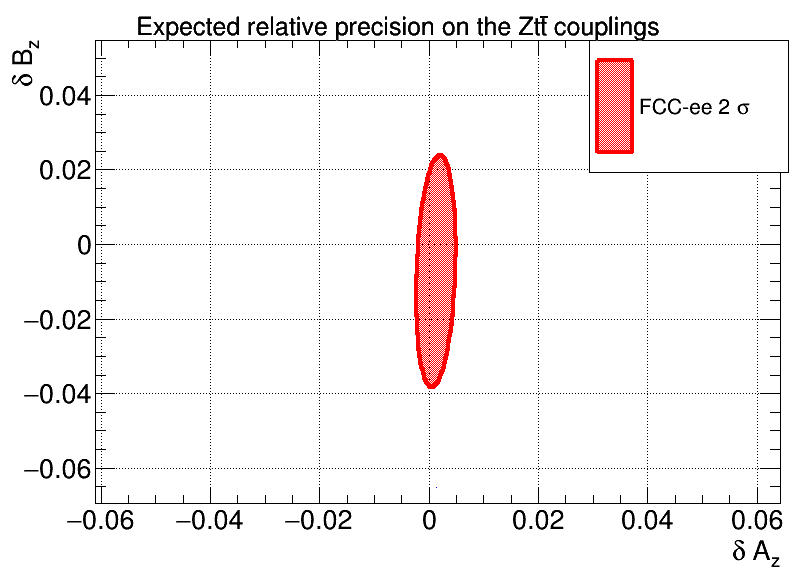

In [6]:
contour_plot_normal = CovarianceMatrix2DContourPlot("Ztt_couplings", 
                                                    total_result, 
                                                    total_covariance_matrix, 
                                                    dict(sigma = 2),
                                                   )
contour_plot_normal.DefineEllipse()
contour_plot_normal.PrepareDraw("Expected relative precision on the Zt#bar{t} couplings",
                                "FCC-ee",
                                "#delta A_{z}",
                                "#delta B_{z}"
                               )
contour_plot_normal.Draw()
contour_plot_normal.canvas.Draw()

### CovarianceMatrix2DContourPlotWithExternalPoints
- subclass of the previous one
- add a dataset of points to be shown together with the ellipse 

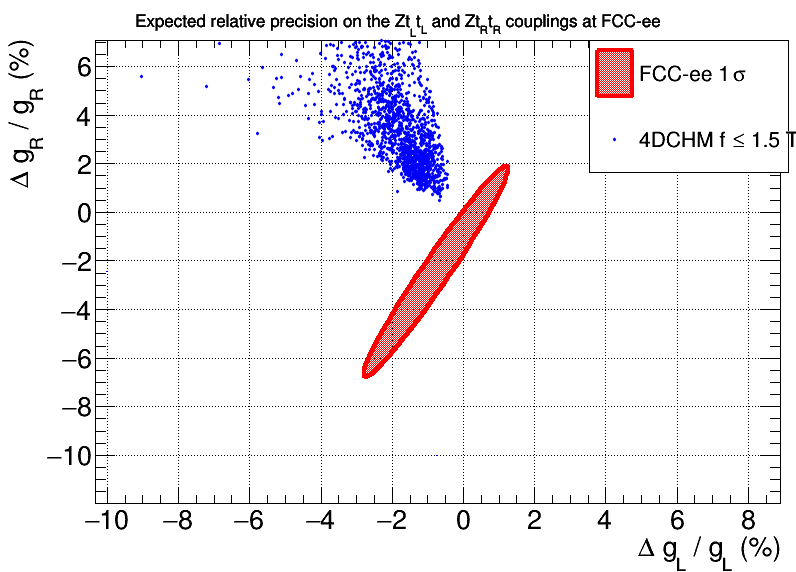

In [7]:
from ttbar_analysis.plot_script.CovarianceMatrixPlotWithExternalPoints import CovarianceMatrixPlotWithExternalPoints

fileName = "../txt/dgl_dgr_fig2left.dat"

contour_plot_rotated = CovarianceMatrixPlotWithExternalPoints("Ztt_lr_couplings", 
                                                              total_result_rotated, 
                                                              total_covariance_matrix_rotated, 
                                                              dict(sigma = 1),
                                                              fileName,
                                                              percentage = True
                                                              )
contour_plot_rotated.DefineEllipse()
contour_plot_rotated.PrepareDraw("Expected relative precision on the Zt_{L}t_{L} and Zt_{R}t_{R} couplings at FCC-ee",
                                 "FCC-ee",
                                 "4DCHM f #leq 1.5 TeV",
                                 "#Delta g_{L} / g_{L}",
                                 "#Delta g_{R} / g_{R}"
                                )
contour_plot_rotated.Draw()
contour_plot_rotated.canvas.Draw()